In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Plot
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# Define dates %y-%m-%d
month = "20%%-06-%%"
# Query
results = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date.like(month))

In [5]:
#  3. Convert the June temperatures to a list.
results = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date.like(month)).all()
type(results)

list

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
tempJun = pd.DataFrame(results, columns=['Station','Date','Tob'])
type(tempJun)

pandas.core.frame.DataFrame

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
tempJun.describe()

,Tob
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
month = "20%%-12-%%"
# Query
results = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date.like(month))

In [9]:
# 7. Convert the December temperatures to a list.
results = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date.like(month)).all()
type(results)

list

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
tempDec = pd.DataFrame(results, columns=['Station','Date','Tob'])
type(tempDec)

pandas.core.frame.DataFrame

In [11]:
tempDec

,Station,Date,Tob
0,USC00519397,2010-12-01,76.0
1,USC00519397,2010-12-03,74.0
2,USC00519397,2010-12-04,74.0
3,USC00519397,2010-12-06,64.0
4,USC00519397,2010-12-07,64.0
...,...,...,...
1512,USC00516128,2016-12-27,71.0
1513,USC00516128,2016-12-28,71.0
1514,USC00516128,2016-12-29,69.0
1515,USC00516128,2016-12-30,65.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
tempDec.describe()

,Tob
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# Join the dataframes for comparation
compare = pd.merge(tempJun, tempDec, on="Station")
compare

,Station,Date_x,Tob_x,Date_y,Tob_y
0,USC00519397,2010-06-01,78.0,2010-12-01,76.0
1,USC00519397,2010-06-01,78.0,2010-12-03,74.0
2,USC00519397,2010-06-01,78.0,2010-12-04,74.0
3,USC00519397,2010-06-01,78.0,2010-12-06,64.0
4,USC00519397,2010-06-01,78.0,2010-12-07,64.0
...,...,...,...,...,...
321443,USC00516128,2017-06-30,75.0,2016-12-27,71.0
321444,USC00516128,2017-06-30,75.0,2016-12-28,71.0
321445,USC00516128,2017-06-30,75.0,2016-12-29,69.0
321446,USC00516128,2017-06-30,75.0,2016-12-30,65.0


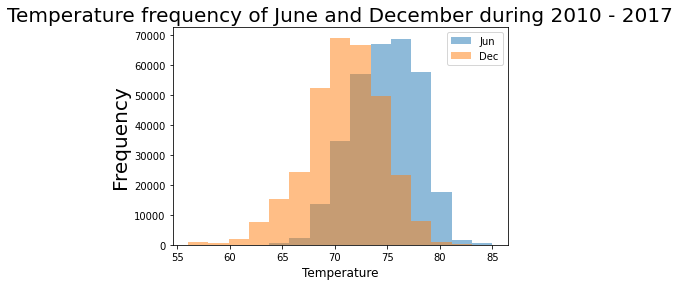

In [14]:
compare.plot.hist(bins=15, alpha=0.5)
# Incorporate the other graph properties
plt.title("Temperature frequency of June and December during 2010 - 2017", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xlabel("Temperature", fontsize=12)
lgnd = plt.legend(fontsize="12", title="Month")
plt.legend(["Jun","Dec"])

# Save the figure.
plt.savefig("Resources/FreqAlongYears.png", bbox_inches = 'tight')


# Additional querys

## Precipitation June

In [23]:
# Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
month = "20%%-06-%%"
# Query
#results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
results = session.query(Measurement.station, Measurement.date, Measurement.prcp).\
    filter(Measurement.date.like(month)).all()
# Convert the December temperatures to a list.
#results = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date.like(month)).all()
#type(results)
# Create a DataFrame from the list of temperatures for the month of December. 
prcpJun = pd.DataFrame(results, columns=['Station','Date','Prcp'])
prcpJun.set_index(prcpJun['Date'], inplace=True)
prcpJun = prcpJun.sort_index()
#type(tempDec)
# Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
prcpJun.describe()

,Prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


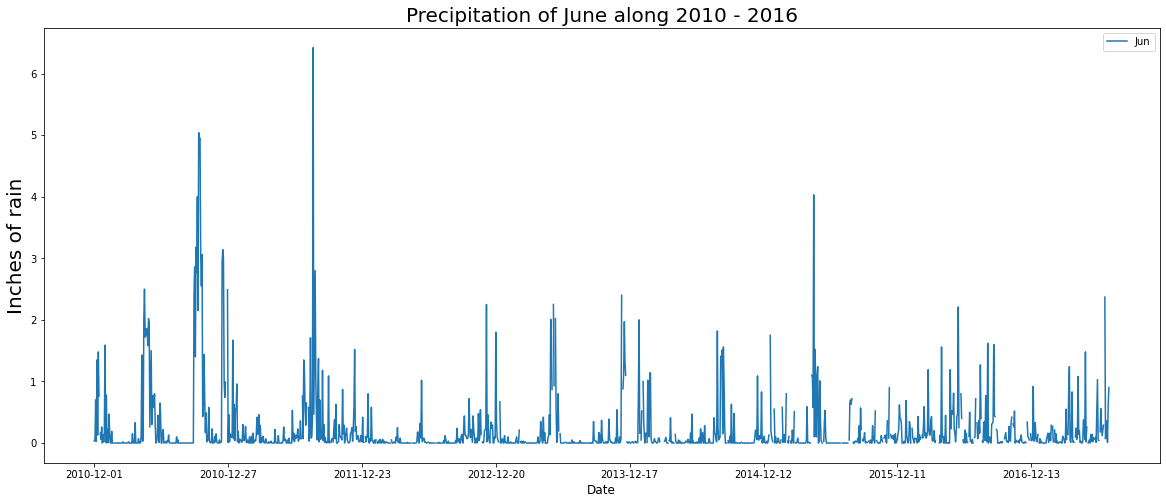

In [52]:
prcpJun.plot()
plt.rcParams["figure.figsize"] = (20,8)
# Incorporate the other graph properties
plt.title("Precipitation of June along 2010 - 2016", fontsize=20)
plt.ylabel("Inches of rain", fontsize=20)
plt.xlabel("Date", fontsize=12)
lgnd = plt.legend(fontsize="12", title="Month")
plt.legend(["Jun"])

# Save the figure.
plt.savefig("Resources/PrecipitationJune.png", bbox_inches = 'tight')

## Precipitation December

In [36]:
# Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
month = "20%%-12-%%"
# Query
#results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
results = session.query(Measurement.station, Measurement.date, Measurement.prcp).\
    filter(Measurement.date.like(month)).all()
# Convert the December temperatures to a list.
#results = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date.like(month)).all()
#type(results)
# Create a DataFrame from the list of temperatures for the month of December. 
prcpJun = pd.DataFrame(results, columns=['Station','Date','Prcp'])
prcpJun.set_index(prcpJun['Date'], inplace=True)
prcpJun = prcpJun.sort_index()
#type(tempDec)
# Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
prcpJun.describe()

,Prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


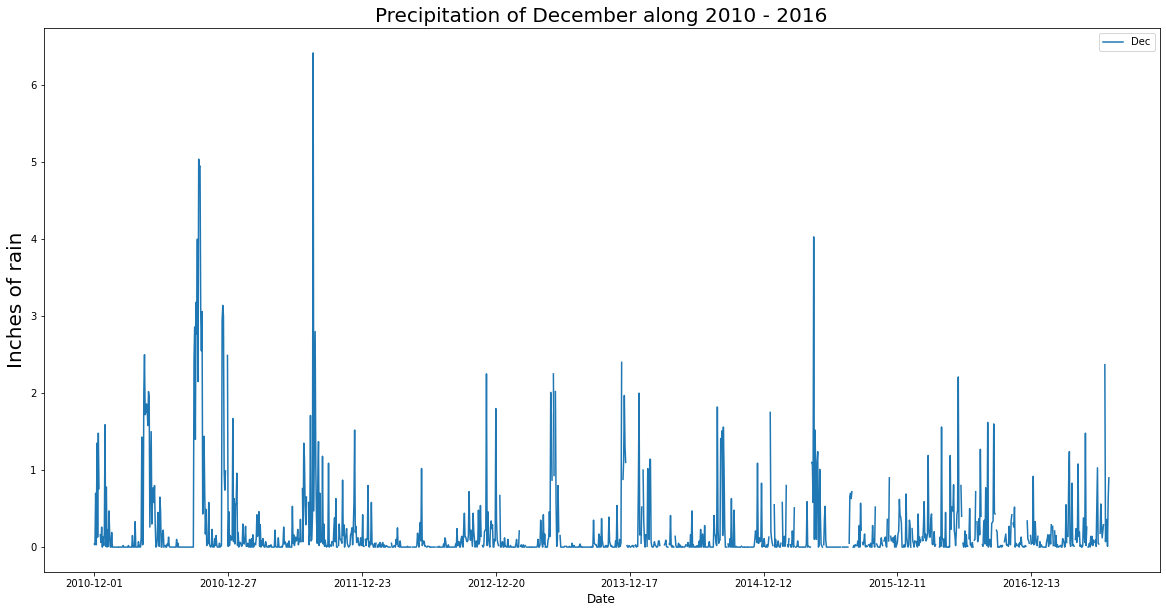

In [51]:
prcpJun.plot()
plt.rcParams["figure.figsize"] = (20,8)
# Incorporate the other graph properties
plt.title("Precipitation of December along 2010 - 2016", fontsize=20)
plt.ylabel("Inches of rain", fontsize=20)
plt.xlabel("Date", fontsize=12)
lgnd = plt.legend(fontsize="12", title="Month")
plt.legend(["Dec"])

# Save the figure.
plt.savefig("Resources/PrecipitationDec.png", bbox_inches = 'tight')